In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
import os
os.getcwd()



'C:\\Users\\Asus'

In [5]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.isnull().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
df.columns = df.columns.str.strip()



In [11]:
df.columns


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

df.head()
print(le.classes_)

[0 1]


In [13]:
# Separate features and target
X = df.drop(['loan_status', 'loan_id'], axis=1)
y = df['loan_status']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((3415, 11), (854, 11))

In [14]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.977751756440281


In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[529   7]
 [ 12 306]]


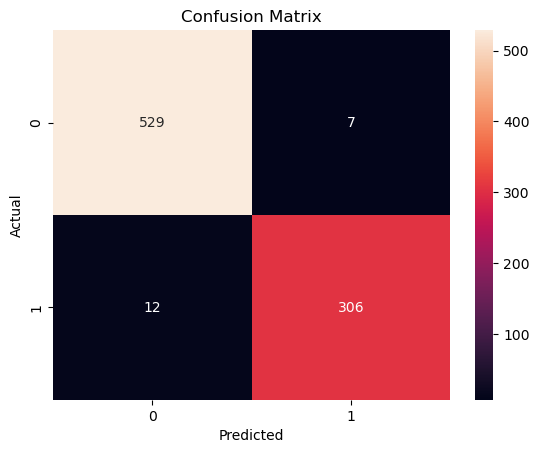

In [16]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
# Example new applicant (unseen data)
new_applicant = [[
    2,      # no_of_dependents
    1,      # education (1 = Graduate maybe)
    0,      # self_employed
    5000000,  # income_annum
    1500000,  # loan_amount
    10,     # loan_term
    750,    # cibil_score
    2000000,  # residential_assets_value
    1000000,  # commercial_assets_value
    500000,   # luxury_assets_value
    300000    # bank_asset_value
]]

prediction = rf.predict(new_applicant)

print("Prediction:", prediction)


Prediction: [0]


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd

new_applicant = pd.DataFrame([{
    'no_of_dependents': 2,
    'education': 1,
    'self_employed': 0,
    'income_annum': 5000000,
    'loan_amount': 1500000,
    'loan_term': 10,
    'cibil_score': 750,
    'residential_assets_value': 2000000,
    'commercial_assets_value': 1000000,
    'luxury_assets_value': 500000,
    'bank_asset_value': 300000
}])

prediction = rf.predict(new_applicant)

print("Prediction:", prediction)


Prediction: [0]


In [19]:
new_applicant_approved = pd.DataFrame([{
    'no_of_dependents': 1,
    'education': 1,            # Graduate
    'self_employed': 0,        # No
    'income_annum': 9000000,   # High income
    'loan_amount': 2000000,
    'loan_term': 15,
    'cibil_score': 820,        # Very good credit score
    'residential_assets_value': 4000000,
    'commercial_assets_value': 2000000,
    'luxury_assets_value': 1000000,
    'bank_asset_value': 1500000
}])

prediction = rf.predict(new_applicant_approved)

print("Prediction:", prediction)


Prediction: [0]


In [20]:
df['loan_status'].value_counts()


loan_status
0    2656
1    1613
Name: count, dtype: int64

In [21]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
6,cibil_score,0.809939
5,loan_term,0.064499
4,loan_amount,0.028938
7,residential_assets_value,0.018168
3,income_annum,0.018060
9,luxury_assets_value,0.017745
10,bank_asset_value,0.015261
8,commercial_assets_value,0.014440
0,no_of_dependents,0.008385
2,self_employed,0.002473


In [22]:
new_applicant_approved = pd.DataFrame([{
    'no_of_dependents': 0,
    'education': 1,
    'self_employed': 0,
    'income_annum': 10000000,
    'loan_amount': 1000000,
    'loan_term': 10,
    'cibil_score': 880,
    'residential_assets_value': 5000000,
    'commercial_assets_value': 2000000,
    'luxury_assets_value': 1000000,
    'bank_asset_value': 2000000
}])

prediction = rf.predict(new_applicant_approved)

print("Prediction:", prediction)


Prediction: [0]


In [23]:
df.groupby('loan_status')['cibil_score'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2656.0,703.461973,125.249016,300.0,618.0,711.0,803.0,900.0
1,1613.0,429.468072,78.401752,300.0,364.0,429.0,493.0,885.0


In [24]:
df['loan_status'].value_counts()


loan_status
0    2656
1    1613
Name: count, dtype: int64

In [26]:
df_temp = pd.read_csv("loan_approval_dataset.csv")
df_temp.columns = df_temp.columns.str.strip()

le_check = LabelEncoder()
df_temp['loan_status'] = le_check.fit_transform(df_temp['loan_status'])

print("Loan Status Mapping:", le_check.classes_)


Loan Status Mapping: [' Approved' ' Rejected']


In [27]:
new_applicant_rejected = pd.DataFrame([{
    'no_of_dependents': 4,
    'education': 0,            # Not Graduate (based on encoding)
    'self_employed': 1,        # Yes
    'income_annum': 2000000,   # Low income
    'loan_amount': 4000000,    # High loan compared to income
    'loan_term': 20,
    'cibil_score': 350,        # Very low credit score
    'residential_assets_value': 500000,
    'commercial_assets_value': 200000,
    'luxury_assets_value': 100000,
    'bank_asset_value': 150000
}])

prediction = rf.predict(new_applicant_rejected)

print("Prediction:", prediction)


Prediction: [1]
